Predictions: [0 0 1]
Actual: [1 0 1]
Accuracy: 0.6666666666666666
Confusion Matrix:
 [[1 0]
 [1 1]]
Prediction for Sunny & Mild: No


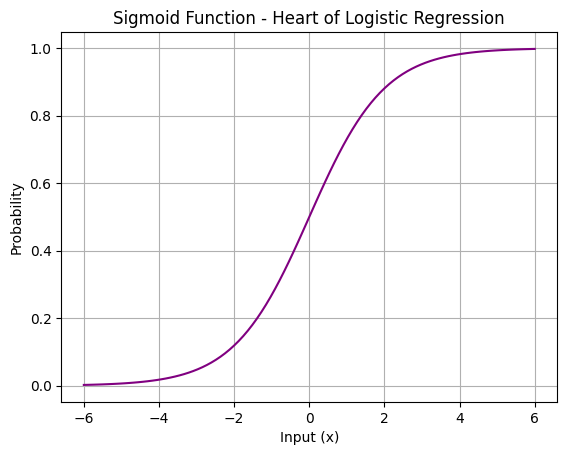

In [2]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Step 2: Create a simple dataset
data = {
    'Weather': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Rainy', 'Rainy', 'Overcast'],
    'Temperature': ['Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild', 'Cool', 'Hot', 'Mild', 'Cool'],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)

# Step 3: Encode text data into numbers
le_weather = LabelEncoder()
le_temp = LabelEncoder()
le_play = LabelEncoder()

df['Weather_n'] = le_weather.fit_transform(df['Weather'])
df['Temperature_n'] = le_temp.fit_transform(df['Temperature'])
df['Play_n'] = le_play.fit_transform(df['Play'])

# Step 4: Prepare features and target
X = df[['Weather_n', 'Temperature_n']]
y = df['Play_n']

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 7: Test predictions
predictions = model.predict(X_test)
print("Predictions:", predictions)
print("Actual:", y_test.values)

# Step 8: Evaluate model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

# Step 9: Predict for new input
new_data = pd.DataFrame([[le_weather.transform(['Sunny'])[0], le_temp.transform(['Mild'])[0]]],
                        columns=['Weather_n', 'Temperature_n'])
pred = model.predict(new_data)
print("Prediction for Sunny & Mild:", le_play.inverse_transform(pred)[0])

# Step 10: Visualize sigmoid-like curve (conceptual)
import numpy as np

x = np.linspace(-6, 6, 100)
y_sigmoid = 1 / (1 + np.exp(-x))

plt.plot(x, y_sigmoid, color='purple')
plt.title("Sigmoid Function - Heart of Logistic Regression")
plt.xlabel("Input (x)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()
